In [92]:
#loading of csv, heavy import
from tkinter import *
from tkinter import ttk
import tkinter as tk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, 
NavigationToolbar2Tk)
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

#df = pd.read_csv('atussum_0321.csv', header='infer')
processed_df = pd.read_csv('processedDF.csv', header='infer')
processed_df.head()

C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (455) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,TUCASEID,MetStat,EduStat,Hisp,Race,Age,LaborStat,IsStudying,SchoolLevel,...,LaborGrp,IsStudyGrp,SchoolLevelGrp,SpousePresentGrp,SpouseEmplGrp,SelfEmplTimeGrp,SpouseEmplTimeGrp,ChildNumGrp,YChildAgeGrp,EarningsGrp
0,0,20030100013280,NaN,44,2,2.0,60,2.0,NaN,NaN,...,Employed,NaN,NaN,Y,N,PT,NaN,None,NaN,Low Middle Class
1,1,20030100013344,NaN,40,2,1.0,41,1.0,2.0,NaN,...,Employed,N,NaN,Y,Y,PT,FT,1-2 children,Baby,Low Income
2,2,20030100013352,NaN,41,2,1.0,26,2.0,2.0,NaN,...,Employed,N,NaN,Y,N,PT,NaN,None,NaN,Low Income
3,3,20030100013848,NaN,39,2,2.0,36,4.0,2.0,NaN,...,Unemployed,N,NaN,Y,Y,NaN,FT,1-2 children,NaN,NaN
4,4,20030100014165,NaN,45,2,1.0,51,1.0,NaN,NaN,...,Employed,NaN,NaN,Y,N,FT,NaN,1-2 children,Teen,NaN


Selected variables: 
 age  0,
 is Hispanic or latino: 0, 
 Living status: 0 ,
 Gender: 0,
 Number of children < 18: 1


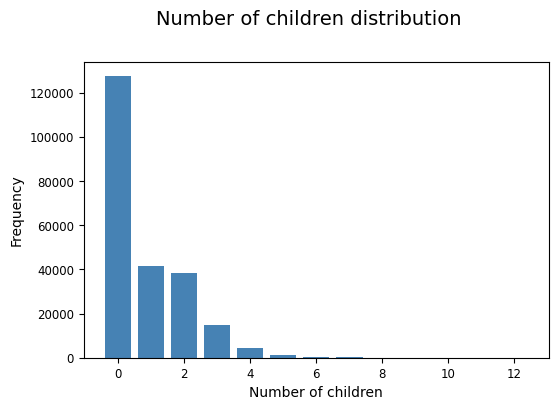

In [193]:
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import glob
import matplotlib.colors as mcolors
from PIL import Image, ImageTk

#shift uppar
master = Tk()

#visualizations
#1D - histograms
def show1DAge1():
    #treat age as categorical variables - better than earlier one where we manually defined beans. Rigth skewing more visible
    fig = plt.figure(figsize = (6, 4))
    title = fig.suptitle("Age Group distribution", fontsize=14)
    fig.subplots_adjust(top=0.85, wspace=0.3)

    ax = fig.add_subplot(1,1, 1)
    ax.set_xlabel("Age groups")
    ax.set_ylabel("Frequency") 
    df_age = processed_df['AgeGrp'].value_counts()
    df_age = (list(df_age.index), list(df_age.values))
    ax.tick_params(axis='both', which='major', labelsize=8.5)
    bar = ax.bar(df_age[0], df_age[1], color='steelblue')
    return fig

def show1DAge2():
    #Creating a pie chart
    plotdfP1 = processed_df.groupby(["AgeGrp"], as_index=False)["TUCASEID"].count()
    labels = plotdfP1["AgeGrp"].unique() 
    values = plotdfP1["TUCASEID"]

    earth_colors = [ "rgb(210,180,140)", "rgb(218,165,32)", "rgb(139,69,19)", "rgb(175, 51, 21)", "rgb(35, 36, 21)", "rgb(188,143,143)", ]

    fig = go.Figure( data=[ go.Pie( labels=labels, values=values, # pull is given as a fraction of the pie radius 
                                   pull=[0.10, 0.11, 0.03, 0.05, 0.03, 0.15], # iterate through earth_colors list to color individual pie pieces 
                                   marker_colors=earth_colors, ) ] )

    # Update layout to show a title
    return fig

def show1DNumOfChildren1():
    #number of children
    fig = plt.figure(figsize = (6, 4))
    title = fig.suptitle("Number of children distribution", fontsize=14)
    fig.subplots_adjust(top=0.85, wspace=0.3)

    ax = fig.add_subplot(1,1, 1)
    ax.set_xlabel("Number of children")
    ax.set_ylabel("Frequency") 
    df_num_children = processed_df['ChildNum'].value_counts()
    df_num_children = (list(df_num_children.index), list(df_num_children.values))
    ax.tick_params(axis='both', which='major', labelsize=8.5)
    bar = ax.bar(df_num_children[0], df_num_children[1], color='steelblue')

    #todo - zoom in for numchildren > 6 using subplot?
    return fig

def show1DNumOfChildren2():
    #Creating a pie chart
    plotdfP1 = processed_df.groupby(["ChildNumGrp"], as_index=False)["TUCASEID"].count()
    labels = plotdfP1["ChildNumGrp"].unique() 
    values = plotdfP1["TUCASEID"]

    earth_colors = [ "rgb(210,180,140)", "rgb(218,165,32)", "rgb(139,69,19)", "rgb(175, 51, 21)", "rgb(35, 36, 21)", "rgb(188,143,143)", ]

    fig = go.Figure( data=[ go.Pie( labels=labels, values=values, # pull is given as a fraction of the pie radius 
                                   pull=[0.10, 0.11, 0.03, 0.05, 0.03, 0.15], # iterate through earth_colors list to color individual pie pieces 
                                   marker_colors=earth_colors, ) ] )

    # Update layout to show a title
    return fig

def show2DChildNumAndMetStat1():
    figure = Figure(figsize=(6, 6))
    ax = figure.subplots()
    sns.countplot(x="ChildNumGrp", hue="MetroGrp", data=processed_df, ax=ax)
    return figure

def show2DChildNumAndMetStat2():
    ## dataframe creation - for plotting
    plotdfDP1 = processed_df.groupby(["MetroGrp", "ChildNumGrp"], as_index=False)["TUCASEID"].count()
    mdf = plotdfDP1[plotdfDP1['MetroGrp'] == "Metro"] \
                             .sort_values(by=['ChildNumGrp'])[['ChildNumGrp', 'TUCASEID']]

    nmdf = plotdfDP1[plotdfDP1['MetroGrp'] == "NonMetro"] \
                                .sort_values(by=['ChildNumGrp'])[['ChildNumGrp', 'TUCASEID']]

    # #get unique values from the just created pandas dataframes and store them in an array
    labels_metro_children_population = mdf['ChildNumGrp']
    labels_nonmetro_children_population = nmdf['ChildNumGrp']

    # # get all the counts from the created pandas dataframes and store them in an array
    values_metro_children_population = mdf['TUCASEID']
    values_nonmetro_children_population = nmdf['TUCASEID']
    ## Creating two pie charts

    # Create subplots: use 'domain' type for Pie subplot
    fig = make_subplots(rows=1, 
                        cols=2, 
                        specs=[[{'type':'domain'}, {'type':'domain'}]])

    # create an array of colors which will be custom colors to the plot
    cafe_colors =  [
                    'rgb(210,180,140)',
                    'rgb(218,165,32)', 
                    'rgb(139,69,19)',
                    'rgb(175, 51, 21)', 
                    'rgb(35, 36, 21)', 
                    'rgb(188,143,143)'
                   ]

    # crate traces to specify the various properties of the first pie chart subplot
    fig.add_trace(go.Pie(labels = labels_metro_children_population,
                         values = values_metro_children_population, 
                         name = "Metro Children Distribution", 
                         marker_colors = cafe_colors),
                   1, 1)

    # crate traces to specify the various properties of the second pie chart subplot
    fig.add_trace(go.Pie(labels = labels_nonmetro_children_population, 
                         values = values_nonmetro_children_population, 
                         name="NonMetro Children Distribution", 
                         marker_colors = cafe_colors),
                  1, 2)

    # Use `hole` to create a donut-like pie chart
    fig.update_traces(hole=.5, 
                      hoverinfo="label+percent+name")

    #adabt layout of the chart for reability
    fig.update_layout(
        # Add annotations in the center of the donut pies.
        annotations=[dict(text = 'Metro', 
                             x = 0.19, 
                             y = 0.5, 
                             font_size = 17, 
                             showarrow = False),

                     dict(text = 'Non Metro', 
                             x = 0.84, 
                             y = 0.5, 
                             font_size = 17, 
                             showarrow = False)])
    return fig

def reset_values():
    global bottom_frame,bottomFrameImage1,bottomFrameImage2,bottomFrameCount 
    age.set(0);
    gender.set(0);
    numberOfChildren.set(0);
    livingStatus.set(0);
    isHorL.set(0);
    earnings.set(0);
    eduStat.set(0);
    race.set(0);
    isEmp.set(0);
    hasSpouse.set(0);
    isSpouseEmployed.set(0);
    #clear image + count
    bottom_frame.destroy()
    create_bottom_frame(1)
    
def var_states():
    print("Selected variables: \n age  %d,\n is Hispanic or latino: %d, \n Living status: %d ,\n Gender: %d,\n Number of children < 18: %d" % (age.get(), isHorL.get(), livingStatus.get(), gender.get(), numberOfChildren.get()))

def create_bottom_frame(x):
    global bottom_frame,bottomFrameImage1,bottomFrameImage2,bottomFrameCount 
    bottom_frame  =  Frame(master,  width=1400,  height=1200)
    bottom_frame.pack(side='bottom',  fill='both',  padx=10,  pady=5,  expand=True)

    if x == 1:
        #visualization
        bottomFrameImage1  =  Frame(bottom_frame, width=600, height=1200) #bg='lightgrey')
        bottomFrameImage1.pack(side='left',fill='both',  padx=5,  pady=5,  expand=True)

        #visualization 2
        bottomFrameImage2  =  Frame(bottom_frame, width=800, height=1200) #bg='lightgrey')
        bottomFrameImage2.pack(side='right',fill='both',  padx=5,  pady=5,  expand=True)
    else:
        #count
        bottomFrameCount  =  Frame(bottom_frame, width=1400,  height=1200) #bg='lightgrey')
        bottomFrameCount.pack(side='top',fill='both',  padx=5,  pady=5,  expand=True)
    
def showCount():
    global bottom_frame,bottomFrameImage1,bottomFrameImage2,bottomFrameCount 
    bottom_frame.destroy()    
    create_bottom_frame(2)

    if livingStatus.get() == 1 and numberOfChildren.get() == 1:
        groupCount = processed_df.groupby(["ChildNum", "MetroGrp"], as_index=False)["TUCASEID"].count()
        groupCountLabel = tk.Label(bottomFrameCount, text=groupCount)
        groupCountLabel.pack()

    elif age.get() == 1:
        groupCount = processed_df.groupby(["AgeGrp"], as_index=False)["TUCASEID"].count()
        groupCountLabel = tk.Label(bottomFrameCount, text=groupCount)
        groupCountLabel.pack()
     
    elif numberOfChildren.get() == 1:
        groupCount = processed_df.groupby(["ChildNum"], as_index=False)["TUCASEID"].count()
        groupCountLabel = tk.Label(bottomFrameCount, text=groupCount)
        groupCountLabel.pack()
    
#     group3 =  df.groupby(['TESEX', 'GTMETSTA', 'TRCHILDNUM'])
#     groupCount = group3.TUCASEID.count()
    
#     groupCountLabel = tk.Label(rightFrameCount, text=groupCount)
#     groupCountLabel.pack()
    
    
#def showSuggestion():
#     global rightFrameWarning
#     rightFrameWarning.destroy()
#     rightFrameWarning  =  Frame(right_frame,  width=1100,  height=300) #bg='lightgrey')
#     rightFrameWarning.pack(side='bottom',  fill='both',  padx=5,  pady=5,  expand=True)

#     warningMsg = tk.Label(rightFrameWarning, text="Some warning text")
#     warningMsg.pack()

def plot():
    #everytime you click on show button, earlier viz gets cleared
    global bottom_frame,bottomFrameImage1,bottomFrameImage2,bottomFrameCount    
    bottom_frame.destroy()
    
    create_bottom_frame(1)
    if livingStatus.get() == 1 and numberOfChildren.get() == 1:
        fig1 = show2DChildNumAndMetStat1()
        #plotly image save first and then display
        fig2 = show2DChildNumAndMetStat2()
        fig2Path = "images/figChildNumAndMetStat.png"
        fig2.write_image(fig2Path)
    elif age.get() == 1:
        fig1 = show1DAge1()
        fig2 = show1DAge2()
        fig2Path = "images/figAgeGrp.png"
        fig2.write_image(fig2Path)
        
    elif numberOfChildren.get() == 1:
        fig1 = show1DNumOfChildren()
        fig2 = show1DNumOfChildren2()
        fig2Path = "images/figChildNumGrp.png"
        fig2.write_image(fig2Path)

    if fig1:
        canvas = FigureCanvasTkAgg(fig1, master=bottomFrameImage1)
        canvas.draw()
        canvas.get_tk_widget().pack()
    if fig2:
        fig2Image = Image.open(fig2Path)
        test = ImageTk.PhotoImage(fig2Image)
        label1 = Label(bottomFrameImage2, image=test)
        label1.image = test
        label1.pack()

    
#     #creating the Matplotlib toolbar
#     toolbar = NavigationToolbar2Tk(canvas,
#                                    right_frame)
#     toolbar.update()  
#     # placing the toolbar on the Tkinter window
#     canvas.get_tk_widget().pack()

master.title('CS 765 - Course Project')
master.geometry("1400x1400")

upper_frame  =  Frame(master,  width=1400,  height=200)# bg='grey')
upper_frame.pack(side='top', padx=10,  pady=5,  expand=True)

#buttons
upperFrameCatButtons  =  Frame(upper_frame) #bg='lightgrey')
upperFrameCatButtons.pack(padx=5,  pady=5,  expand=True)

upperFrameBinButtons  =  Frame(upper_frame) #bg='lightgrey')
upperFrameBinButtons.pack(padx=5,  pady=5,  expand=True)

#show count using pandas library
# leftFrameCount  =  Frame(left_frame,  width=150,  height=200) #bg='lightgrey')
# leftFrameCount.pack(side='bottom',  fill='both',  padx=5,  pady=5,  expand=True)

#buttons
variables = Label(upperFrameCatButtons, text="Variables", anchor='n', font=("Arial", 16))

catVariables = Label(upperFrameCatButtons, text="Categorical",font=("Arial", 12))

age = IntVar()
age_button = Checkbutton(upperFrameCatButtons, text="Age", variable=age)

numberOfChildren = IntVar()
numberOfChildren_button = Checkbutton(upperFrameCatButtons, text="Number of children < 18", variable=numberOfChildren)

eduStat = IntVar()
eduStat_button = Checkbutton(upperFrameCatButtons, text="Education status", variable=eduStat)

earnings = IntVar()
earnings_button = Checkbutton(upperFrameCatButtons, text="Income class", variable=earnings)

race = IntVar()
race_button = Checkbutton(upperFrameCatButtons, text="Ethnicity", variable=race)

variables.pack(side='top',fill='both')
catVariables.pack(side='left',padx=10)
age_button.pack(side='left')
numberOfChildren_button.pack(side='left')
eduStat_button.pack(side='left')
earnings_button.pack(side='left')
race_button.pack(side='left')

binVariables = Label(upperFrameBinButtons, text="Binary",font=("Arial", 12))

gender = IntVar()
gender_button = Checkbutton(upperFrameBinButtons, text="Gender", variable=gender)

livingStatus = IntVar()
livingStatus_button = Checkbutton(upperFrameBinButtons, text="Living Status", variable=livingStatus)

isHorL = IntVar()
isHorL_button = Checkbutton(upperFrameBinButtons, text="Is Hispanic / Latino?", variable=isHorL)

isEmp = IntVar()
isEmp_button = Checkbutton(upperFrameBinButtons, text="Is Employed?", variable=isEmp)

hasSpouse = IntVar()
hasSpouse_button = Checkbutton(upperFrameBinButtons, text="Is Married?", variable=hasSpouse)

isSpouseEmployed = IntVar()
isSpouseEmployed_button = Checkbutton(upperFrameBinButtons, text="Is Spouse Employed?", variable=isSpouseEmployed)

binVariables.pack(side='left',padx=10)
gender_button.pack(side='left')
livingStatus_button.pack(side='left')
isHorL_button.pack(side='left')
isEmp_button.pack(side='left')
hasSpouse_button.pack(side='left')
isSpouseEmployed_button.pack(side='left')

upperFrameButtons  =  Frame(upper_frame) #bg='lightgrey')
upperFrameButtons.pack(padx=5,  pady=5,  expand=True)

show_count_button = Button(upperFrameButtons, text='Show Count', command=lambda:[var_states(), showCount()])
show_visualiztion_button = Button(upperFrameButtons, text='Show Visualization', command=lambda:[var_states(), plot()])

reset_button = Button(upperFrameButtons, text='Reset', command=reset_values)

show_count_button.pack(side='left',padx=5,pady=5)
show_visualiztion_button.pack(side='left',padx=5,pady=5)
reset_button.pack(side='left',padx=5,pady=5)

create_bottom_frame(1)
# #use this pane for showing warning, regrouping suggestions etc
# rightFrameWarning  =  Frame(right_frame) #bg='lightgrey')
# rightFrameWarning.pack(side='bottom',  fill='both',  padx=5,  pady=5,  expand=True)

master.mainloop()